In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_performance = pd.read_csv('data/Broadband/BroadbandCleaned/broadband_filtered_performance_all.csv')
data_county = pd.read_csv('data/HousingPrice/HousingPriceCleaned/profiled_data.csv')
data_yorkshire =  data_county[data_county['County'].str.contains('Yorkshire', case=False)]
data_oxfordshire = data_county[data_county['County'].str.contains('Oxfordshire', case=False)]

In [3]:
matching_postcodes = data_yorkshire['Post Code'].tolist()
filtered_data_performance_yk = data_performance[data_performance['postcode_space'].isin(matching_postcodes)]

filtered_data_performance_yk = filtered_data_performance_yk.merge(data_yorkshire, left_on='postcode_space', right_on='Post Code', how='inner')
filtered_data_performance_yk.head(5)

matching_postcodes = data_oxfordshire['Post Code'].tolist()

filtered_data_performance_ox = data_performance[data_performance['postcode_space'].isin(matching_postcodes)]
filtered_data_performance_ox = filtered_data_performance_ox.merge(data_oxfordshire, left_on='postcode_space', right_on='Post Code', how='inner')
filtered_data_performance_ox.head(5)


,postcode_space,Median download speed (Mbit/s),Average download speed (Mbit/s),Maximum download speed (Mbit/s),Price,Post Code,City,District,County
0,OX10 0AL,73.7,75.2,160.00,160000,OX10 0AL,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
1,OX10 0AX,100.0,112.4,350.00,375000,OX10 0AX,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
2,OX10 0BN,26.1,41.4,69.75,810000,OX10 0BN,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
3,OX10 0BP,79.7,151.3,500.00,245000,OX10 0BP,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE
4,OX10 0BP,79.7,151.3,500.00,1626000,OX10 0BP,WALLINGFORD,SOUTH OXFORDSHIRE,OXFORDSHIRE


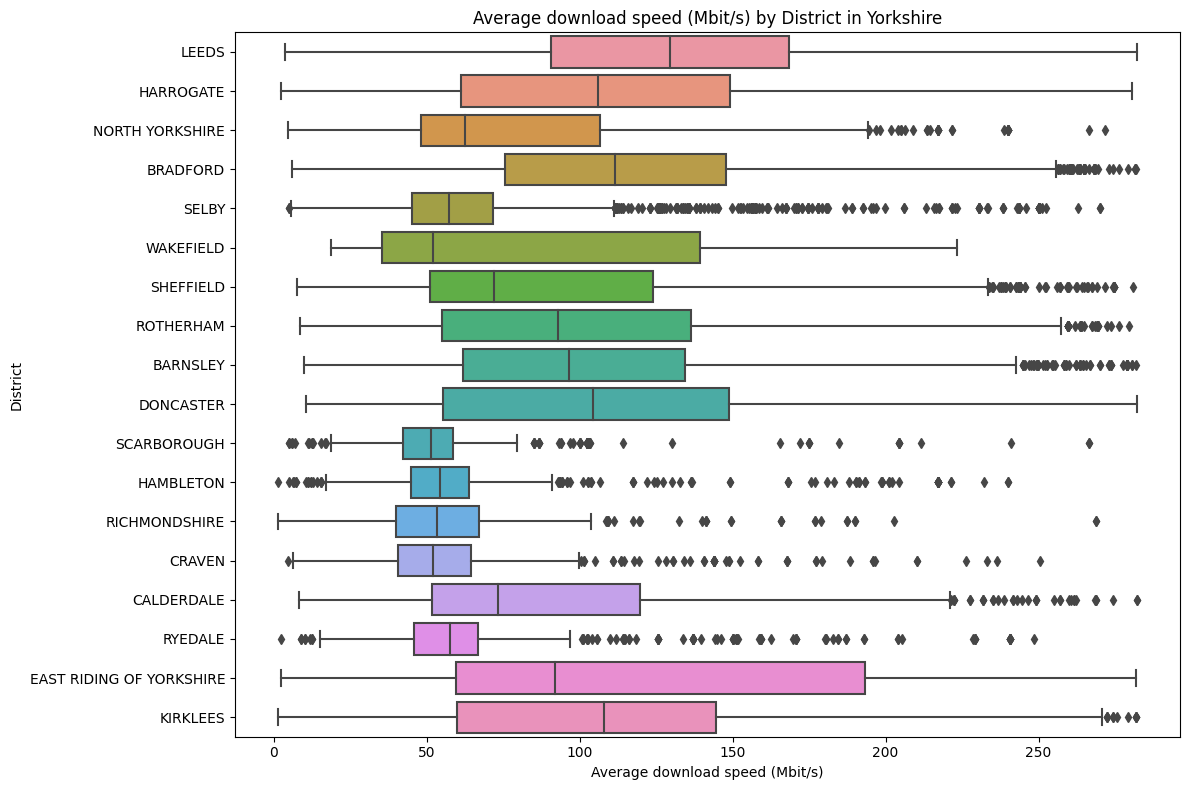

In [4]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_performance_yk['Average download speed (Mbit/s)'] = remove_outliers(filtered_data_performance_yk['Average download speed (Mbit/s)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_performance_yk, y='District', x='Average download speed (Mbit/s)', orient='h')
plt.xlabel('Average download speed (Mbit/s)')
plt.ylabel('District')
plt.title('Average download speed (Mbit/s) by District in Yorkshire')
plt.tight_layout()
plt.show()

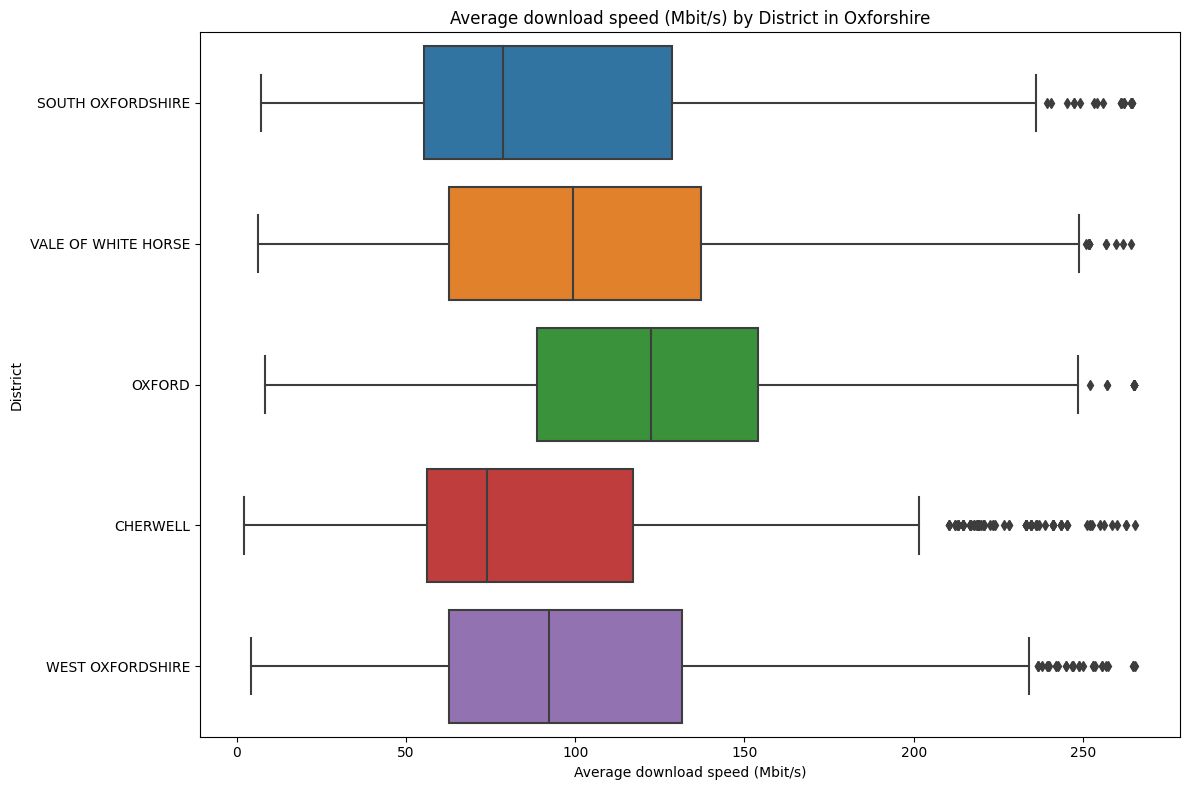

In [5]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_performance_ox['Average download speed (Mbit/s)'] = remove_outliers(filtered_data_performance_ox['Average download speed (Mbit/s)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_performance_ox, y='District', x='Average download speed (Mbit/s)', orient='h')
plt.xlabel('Average download speed (Mbit/s)')
plt.ylabel('District')
plt.title('Average download speed (Mbit/s) by District in Oxforshire')
plt.tight_layout()
plt.show()

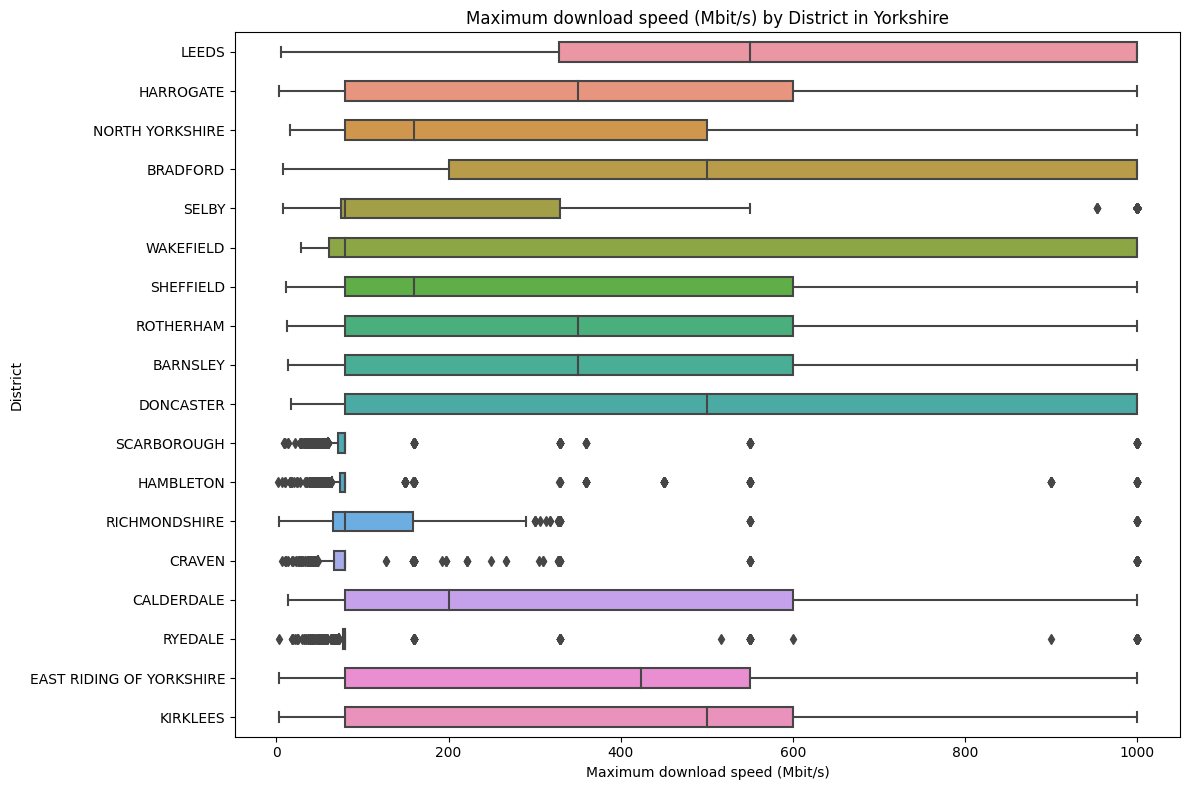

In [6]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_performance_yk['Maximum download speed (Mbit/s)'] = remove_outliers(filtered_data_performance_yk['Maximum download speed (Mbit/s)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_performance_yk, y='District', x='Maximum download speed (Mbit/s)',width=0.5, orient='h')
plt.xlabel('Maximum download speed (Mbit/s)')
plt.ylabel('District')
plt.title('Maximum download speed (Mbit/s) by District in Yorkshire')
plt.tight_layout()
plt.show()

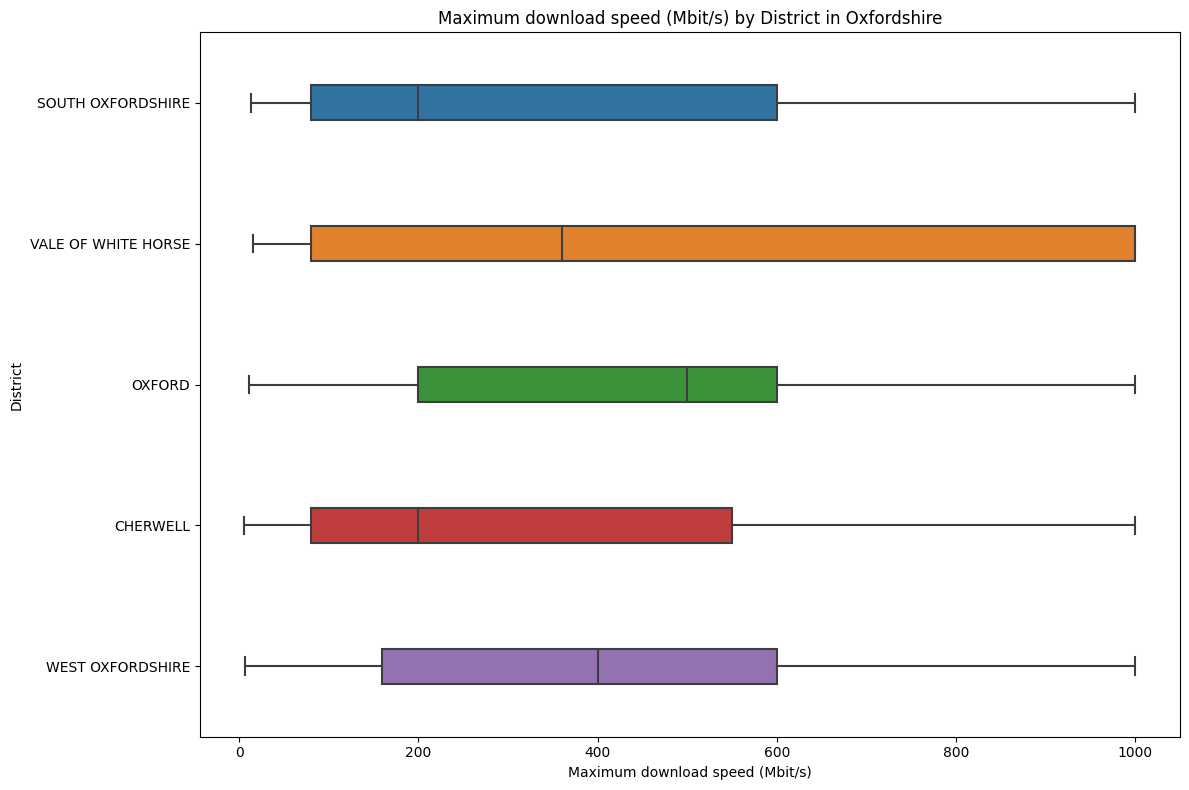

In [10]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.loc[(series >= lower_bound) & (series <= upper_bound)]

filtered_data_performance_ox['Maximum download speed (Mbit/s)'] = remove_outliers(filtered_data_performance_ox['Maximum download speed (Mbit/s)'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data_performance_ox, y='District', x='Maximum download speed (Mbit/s)',width=0.25, orient='h')
plt.xlabel('Maximum download speed (Mbit/s)')
plt.ylabel('District')
plt.title('Maximum download speed (Mbit/s) by District in Oxfordshire')
plt.tight_layout()
plt.show()

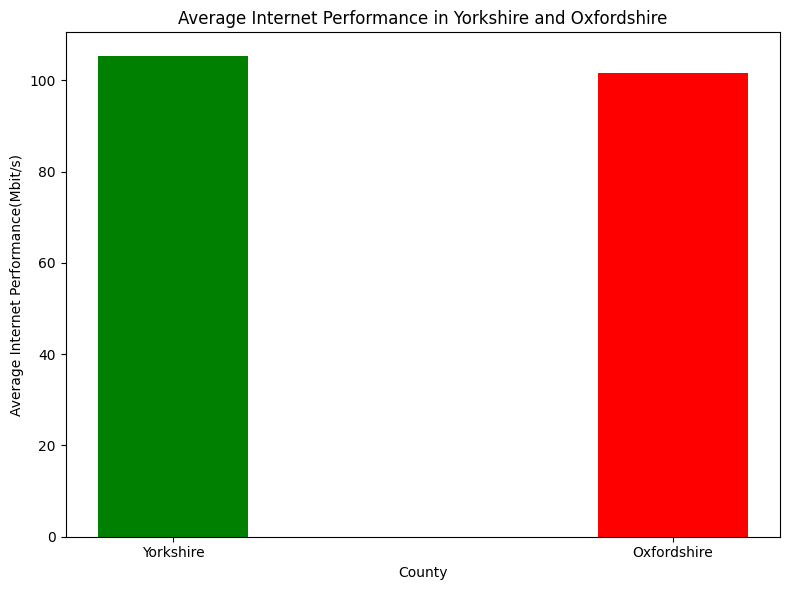

In [8]:
average_performance_yorkshire = filtered_data_performance_yk['Average download speed (Mbit/s)'].mean()
average_performance_oxfordshire = filtered_data_performance_ox['Average download speed (Mbit/s)'].mean()
counties = ['Yorkshire', 'Oxfordshire']
average_performance = [average_performance_yorkshire, average_performance_oxfordshire]

bar_width = 0.3
x_positions = [0, 1]

plt.figure(figsize=(8, 6))
plt.bar(x_positions, average_performance, color=['green', 'red'], width=bar_width, align='center')
plt.xlabel('County')
plt.ylabel('Average Internet Performance(Mbit/s)')
plt.title('Average Internet Performance in Yorkshire and Oxfordshire')
plt.xticks(x_positions, counties)

plt.tight_layout()
plt.show()

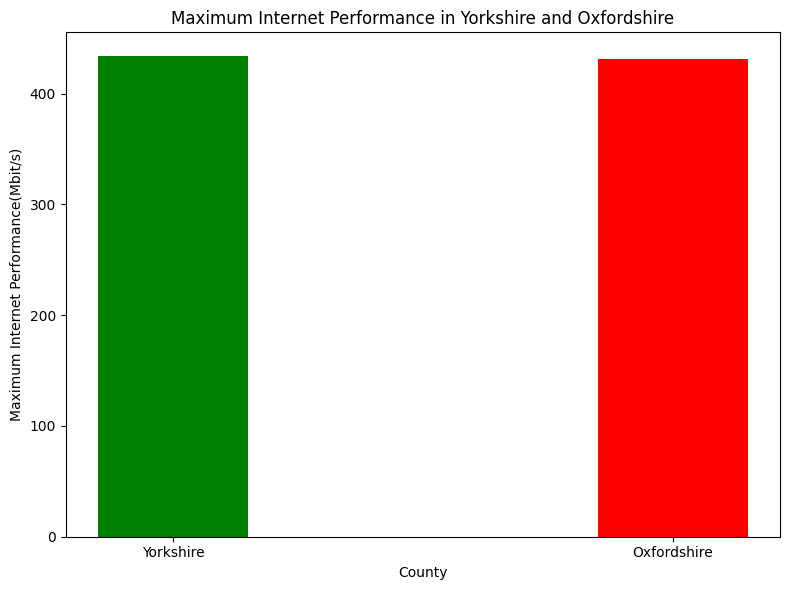

In [9]:
average_performance_yorkshire = filtered_data_performance_yk['Maximum download speed (Mbit/s)'].mean()
average_performance_oxfordshire = filtered_data_performance_ox['Maximum download speed (Mbit/s)'].mean()
counties = ['Yorkshire', 'Oxfordshire']
average_performance = [average_performance_yorkshire, average_performance_oxfordshire]

bar_width = 0.3
x_positions = [0, 1]

plt.figure(figsize=(8, 6))
plt.bar(x_positions, average_performance, color=['green', 'red'], width=bar_width, align='center')
plt.xlabel('County')
plt.ylabel('Maximum Internet Performance(Mbit/s)')
plt.title('Maximum Internet Performance in Yorkshire and Oxfordshire')
plt.xticks(x_positions, counties)

plt.tight_layout()
plt.show()